In [11]:
import numpy as np
import pickle
import pandas as pd

with open("attention_weights/lemma_attn", "rb") as f:
    lemma_attn = pickle.load(f)
    
with open("attention_weights/tag_attn", "rb") as f:
    tag_attn = pickle.load(f)

In [12]:
words = pd.read_table("attention_weights/hungarian-dev.out", names=["lemma", "inflected", "tags"])
d = pd.read_table("../data/conll2018/task1/all/hungarian-dev", names=["lemma", "inflected", "tags"])
d = d[["inflected"]].rename(columns={"inflected": "correct"})
words = pd.concat((words, d), axis=1)
words.head()

,lemma,inflected,tags,correct
0,észszerűsít,észszerűsítsz,V;SBJV;PRS;DEF;2;SG,észszerűsítsd
1,paradigmaváltás,paradigmaváltásban,N;IN+ESS;SG,paradigmaváltásban
2,szúnyog,szúnyognoszún,N;ON+ESS;SG,szúnyogon
3,felbujtó,felbujtókokhuz,N;INST;PL,felbujtókkal
4,tátog,tátogsztátol,V;IND;PRS;INDF;2;SG,tátogsz


Input lemma: diagnosztika
Input tags: N;IN+ABL;PL
Expected output: diagnosztikákból
Model output: diagnosztikakból
Correct: False


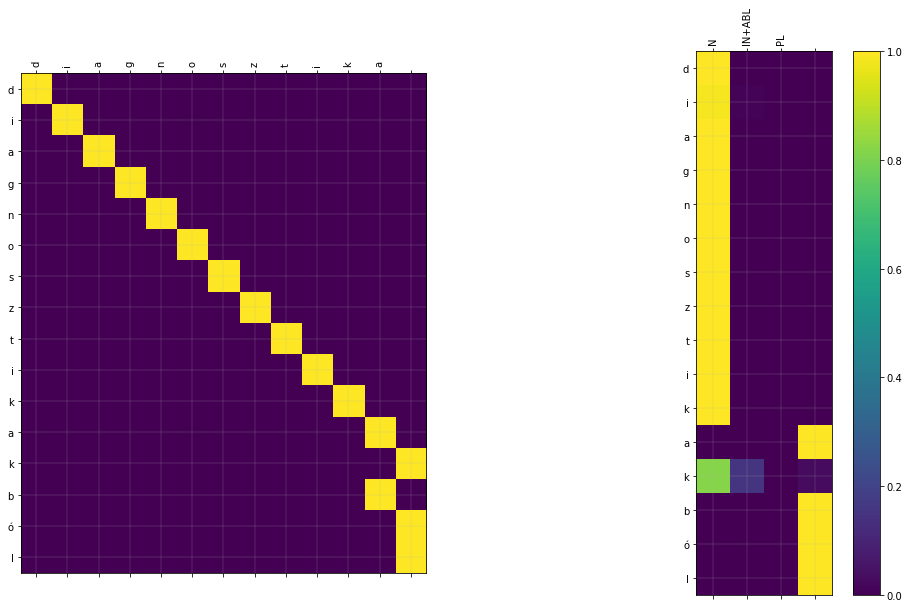

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline


def plot_random_word():
    word = words.sample(1)
    batch_size = lemma_attn[0].shape[0]
    batch = word.index[0] // batch_size
    batch_idx = word.index[0] % batch_size
    la = lemma_attn[batch][batch_idx]
    ta = tag_attn[batch][batch_idx]
    lemma = word.iloc[0].lemma
    inflected = word.iloc[0].inflected
    tags = word.iloc[0].tags
    correct = word.iloc[0].correct
    print("Input lemma: {}".format(lemma))
    print("Input tags: {}".format(tags))
    print("Expected output: {}".format(correct))
    print("Model output: {}".format(inflected))
    print("Correct: {}".format(correct==inflected))
    la = la[:len(inflected)]
    ta = ta[:len(inflected)]
    
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 10))
    title = "{} -- {}".format(lemma, inflected)
    cax = ax[0].matshow(la)
    ax[0].set_xticklabels([''] + list(lemma), rotation=90)
    ax[0].set_yticklabels([''] + list(inflected))
    ax[0].xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax[0].yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax[0].grid(linewidth=.2)
    fig.colorbar(cax)
    
    cax = ax[1].matshow(ta)
    ax[1].set_xticklabels([''] + tags.split(';'), rotation=90)
    ax[1].set_yticklabels([''] + list(inflected))
    ax[1].xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax[1].yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax[1].grid(linewidth=.2)
    
plot_random_word()

Input lemma: megismer
Input tags: V;IND;PRS;DEF;1;PL
Expected output: megismerjük
Model output: megismerjjügis
Correct: False


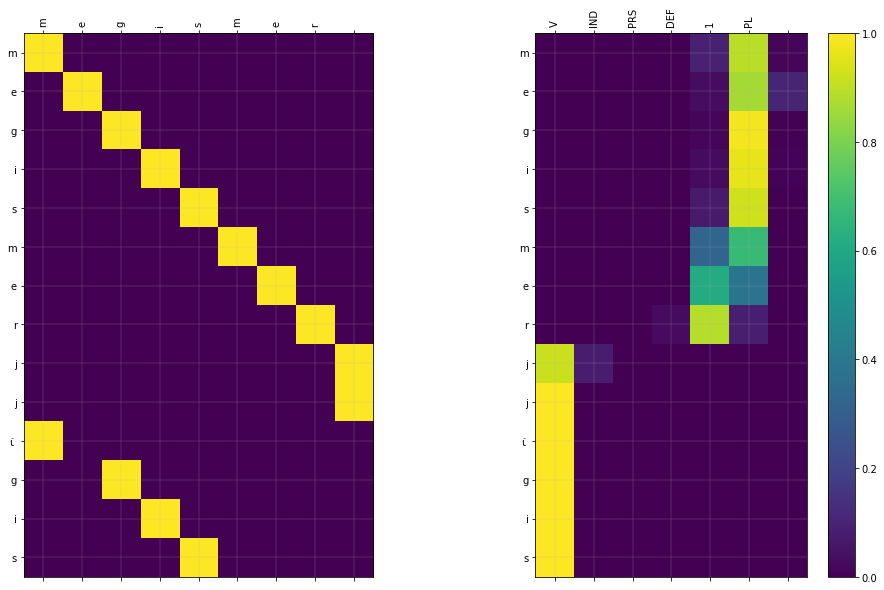

In [14]:
plot_random_word()

Input lemma: kutyaszán
Input tags: N;ACC;PL
Expected output: kutyaszánokat
Model output: kutyaszánnok
Correct: False


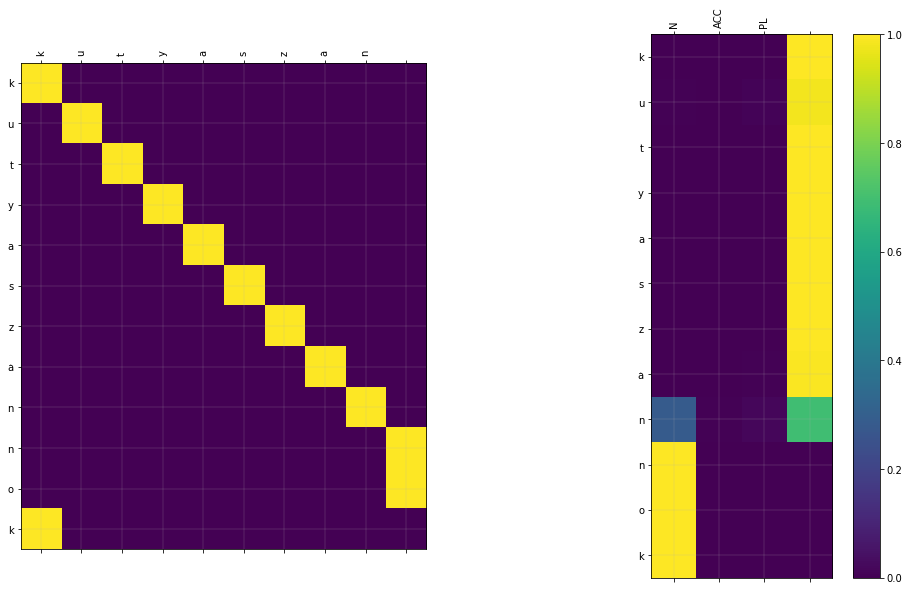

In [15]:
plot_random_word()

Input lemma: néma
Input tags: N;DAT;SG
Expected output: némának
Model output: némanasném
Correct: False


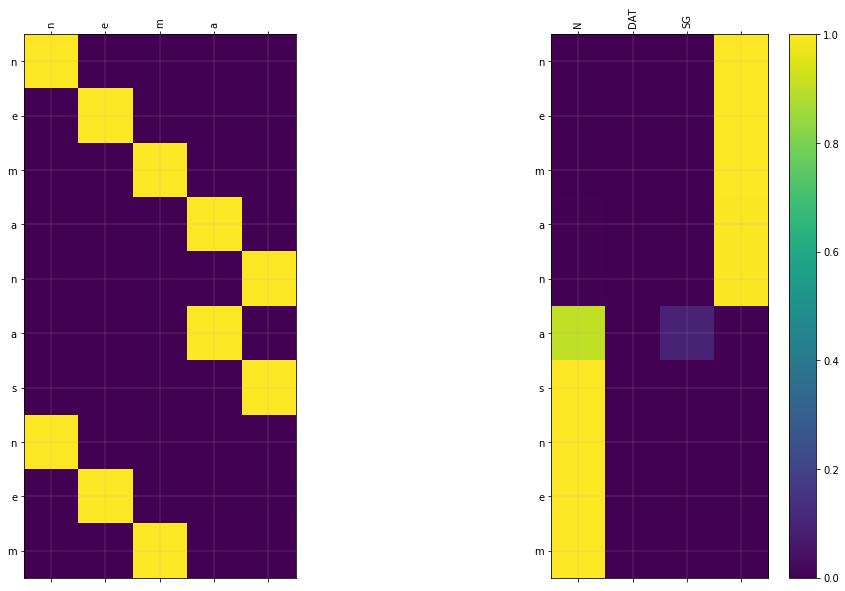

In [16]:
plot_random_word()

Input lemma: megkövet
Input tags: V;NFIN;3;SG
Expected output: megkövetnie
Model output: megkövetnimenö
Correct: False


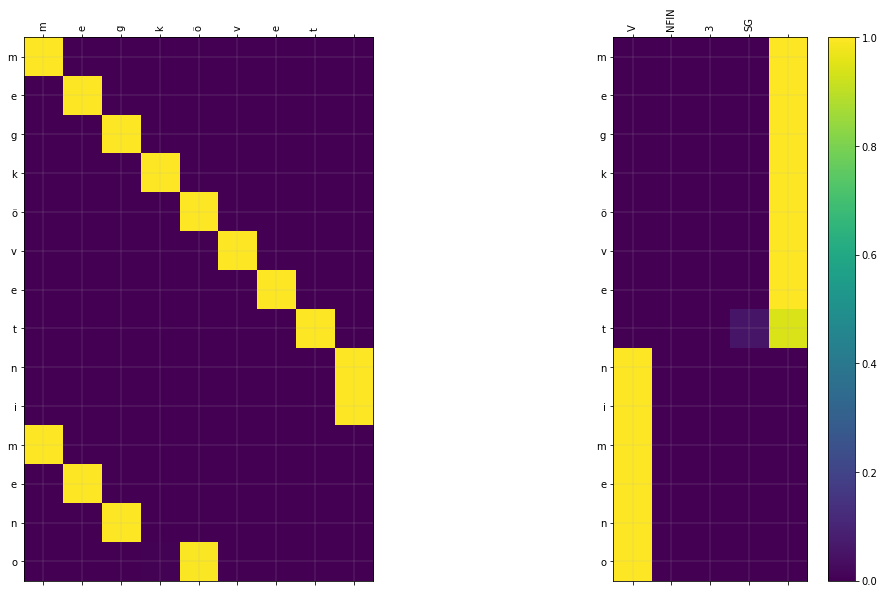

In [17]:
plot_random_word()

Input lemma: statisztika
Input tags: N;IN+ESS;PL
Expected output: statisztikákban
Model output: statisztikákákban
Correct: False


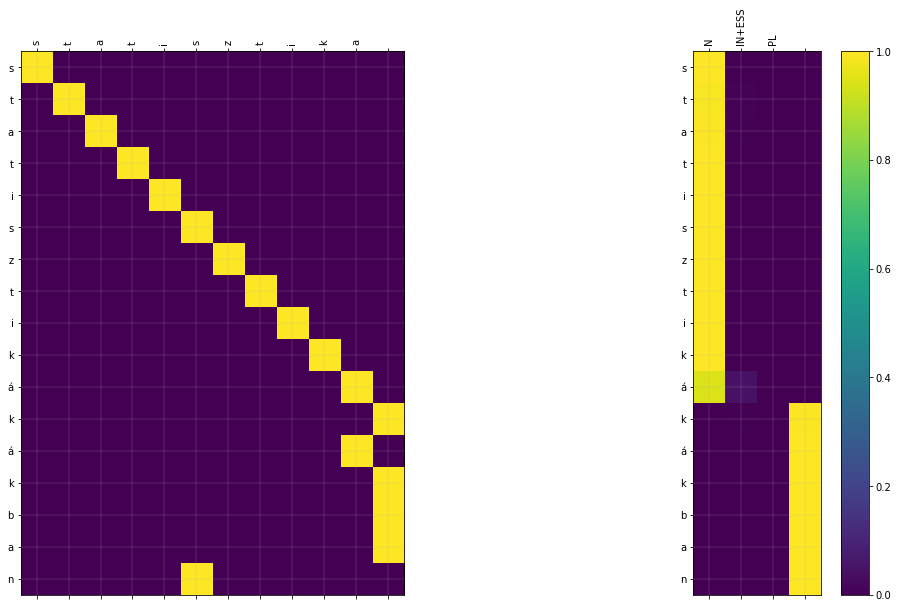

In [18]:
plot_random_word()

Input lemma: mosoly
Input tags: N;FRML;SG
Expected output: mosolyként
Model output: mosolyokként
Correct: False


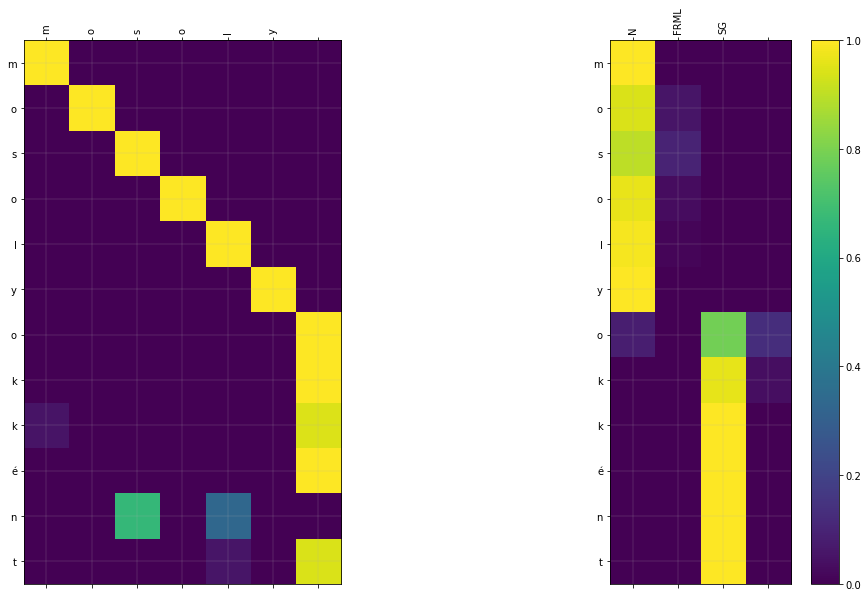

In [19]:
plot_random_word()

Input lemma: másfajta
Input tags: N;PRP;SG
Expected output: másfajtáért
Model output: másfajtanaámaj
Correct: False


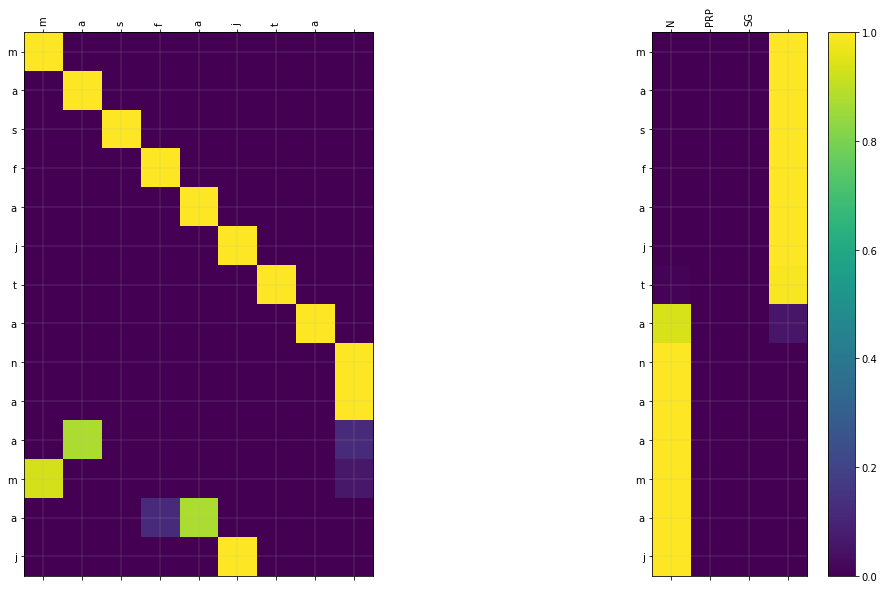

In [20]:
plot_random_word()